In [1]:
import pandas as pd
import spacy
import networkx as nx                        # a really useful network analysis library
import matplotlib.pyplot as plt
# from networkx.algorithms import community   # not used, yet... 
import datetime                              # access to %%time, for timing individual notebook cells
import os


In [29]:
rowlimit = 1000

In [30]:
data = pd.read_csv('data_cleaned_w_sentiment.csv',  nrows = rowlimit)
data.head(2)

,date,id,name,text,location,mention,text_clean,tidy_tweet,tokenised,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,sentiment
0,2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False,Bitcoin History Part 7: The First Major Hack ...,Bitcoin History Pa First Major Hack hps news b...,"['bitcoin', 'history', 'pa', 'first', 'major',...","['bitcoin', 'history', 'pa', 'first', 'major',...","['bitcoin', 'histori', 'pa', 'first', 'major',...","['bitcoin', 'history', 'pa', 'first', 'major',...",0.000
1,2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False,... but it’s not working. I love you all. Hap...,working love Happy year bitcoin ethereum,"['working', 'love', 'happy', 'year', 'bitcoin'...","['working', 'love', 'happy', 'year', 'bitcoin'...","['work', 'love', 'happi', 'year', 'bitcoin', '...","['working', 'love', 'happy', 'year', 'bitcoin'...",0.836


In [31]:
plt.rcParams['figure.figsize'] = [10, 10]

In [32]:
#nlp = spacy.load('en_core_web_lg')
import en_core_web_lg

In [33]:
#nlp = spacy.load('en_core_web_lg')
nlp = en_core_web_lg.load()

In [34]:
tokens = []
lemma = []
pos = []
parsed_doc = [] 
col_to_parse = 'Tweet'

for doc in nlp.pipe(data['tidy_tweet'].astype('unicode').values, batch_size=50,
                        n_threads=3):
    if doc.is_parsed:
        parsed_doc.append(doc)
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        pos.append(None)


In [35]:
data['parsed_doc'] = parsed_doc
data['comment_tokens'] = tokens
data['comment_lemma'] = lemma
data['pos_pos'] = pos

In [36]:
data.head(2)

,date,id,name,text,location,mention,text_clean,tidy_tweet,tokenised,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,sentiment,parsed_doc,comment_tokens,comment_lemma,pos_pos
0,2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False,Bitcoin History Part 7: The First Major Hack ...,Bitcoin History Pa First Major Hack hps news b...,"['bitcoin', 'history', 'pa', 'first', 'major',...","['bitcoin', 'history', 'pa', 'first', 'major',...","['bitcoin', 'histori', 'pa', 'first', 'major',...","['bitcoin', 'history', 'pa', 'first', 'major',...",0.000,"(Bitcoin, History, Pa, First, Major, Hack, hps...","[Bitcoin, History, Pa, First, Major, Hack, hps...","[Bitcoin, History, Pa, First, Major, Hack, hps...","[PROPN, PROPN, PROPN, PROPN, PROPN, PROPN, NOU..."
1,2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False,... but it’s not working. I love you all. Hap...,working love Happy year bitcoin ethereum,"['working', 'love', 'happy', 'year', 'bitcoin'...","['working', 'love', 'happy', 'year', 'bitcoin'...","['work', 'love', 'happi', 'year', 'bitcoin', '...","['working', 'love', 'happy', 'year', 'bitcoin'...",0.836,"(working, love, Happy, year, bitcoin, ethereum)","[working, love, Happy, year, bitcoin, ethereum]","[work, love, happy, year, bitcoin, ethereum]","[VERB, NOUN, ADJ, NOUN, NOUN, NOUN]"


In [37]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stopwords: %d' % len(stop_words))
print(list(stop_words))

Number of stopwords: 326
['until', 'next', 'to', 'who', '’d', 'you', 'hence', 'side', 'also', 'somewhere', "'ve", 'around', 'either', '‘d', '‘ll', 'show', 'the', 'therefore', 'whereas', 'they', 'enough', 'never', 'thereupon', 'whether', 'thence', 'forty', 're', 'namely', 'when', 'former', 'which', 'neither', 'us', 'very', 'every', 'of', 'all', 'elsewhere', 'by', 'its', '‘m', 'own', 'myself', 'beyond', 'hereafter', 'is', 'ca', 'front', 'yours', 'would', 'n’t', '’re', 'often', 'just', "'s", 'beforehand', 'off', 'we', 'once', 'hundred', 'other', 'over', 'might', 'together', 'behind', 'well', 'therein', 'yourselves', 'those', 'through', "'m", 'hers', 'seeming', 'four', 'less', 'meanwhile', 'nine', 'she', 'alone', 'becomes', 'many', 'are', 'thus', 'made', 'done', 'hereupon', 'herself', 'both', 'such', 'move', 'on', 'various', 'where', 'what', 'still', 'something', 'whenever', 'others', 'due', 'moreover', '’m', 'as', 'upon', 'will', 'one', 'last', 'must', 'if', 'two', 'no', 'his', 'more', 't

In [38]:
print(data['parsed_doc'][0].similarity(data['parsed_doc'][1]))
print(data['parsed_doc'][0].similarity(data['parsed_doc'][10]))
print(data['parsed_doc'][1].similarity(data['parsed_doc'][10]))

0.6325561657826978
0.623372571403769
0.834942719870676


In [39]:
world_data = data

In [40]:
# takes 1s for 500 nodes - but of course this won't scale linearly!                              
raw_G = nx.Graph() # undirected
n = 0

In [41]:
for i in world_data['parsed_doc']:        # sure, it's inefficient, but it will do
    for j in world_data['parsed_doc']:
        if i != j:
            if not (raw_G.has_edge(j, i)):
                sim = i.similarity(j)
                raw_G.add_edge(i, j, weight = sim)
                n = n + 1

In [42]:
print(raw_G.number_of_nodes(), "nodes, and", raw_G.number_of_edges(), "edges created.")

1000 nodes, and 499500 edges created.


In [43]:
edges_to_kill = []
min_wt = 0.94      # this is our cutoff value for a minimum edge-weight 

for n, nbrs in raw_G.adj.items():
    #print("\nProcessing origin-node:", n, "... ")
    for nbr, eattr in nbrs.items():
        # remove edges below a certain weight
        data = eattr['weight']
        if data < min_wt: 
            # print('(%.3f)' % (data))  
            # print('(%d, %d, %.3f)' % (n, nbr, data))  
            #print("\nNode: ", n, "\n <-", data, "-> ", "\nNeighbour: ", nbr)
            edges_to_kill.append((n, nbr)) 
            
print("\n", len(edges_to_kill) / 2, "edges to kill (of", raw_G.number_of_edges(), "), before de-duplicating")


 499209.0 edges to kill (of 499500 ), before de-duplicating


In [44]:
for u, v in edges_to_kill:
    if raw_G.has_edge(u, v):   # catches (e.g.) those edges where we've removed them using reverse ... (v, u)
        raw_G.remove_edge(u, v)

In [45]:
strong_G = raw_G
print(strong_G.number_of_edges())

291


In [46]:
options = {
    'node_color': 'black',
    'node_size': 30,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,}

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


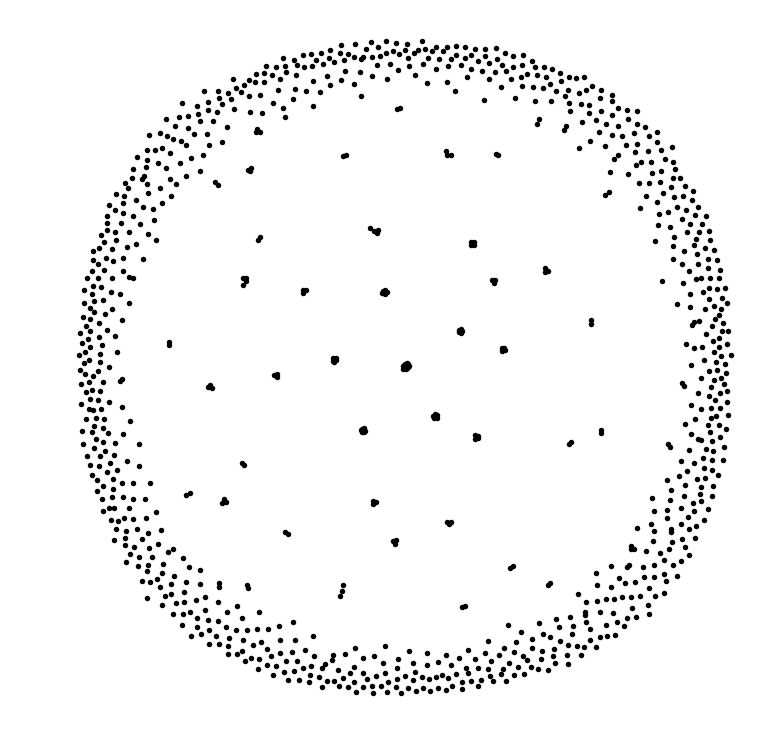

In [47]:
nx.draw(strong_G,  edge_color='gray', **options)

In [48]:
strong_G.remove_nodes_from(list(nx.isolates(strong_G)))

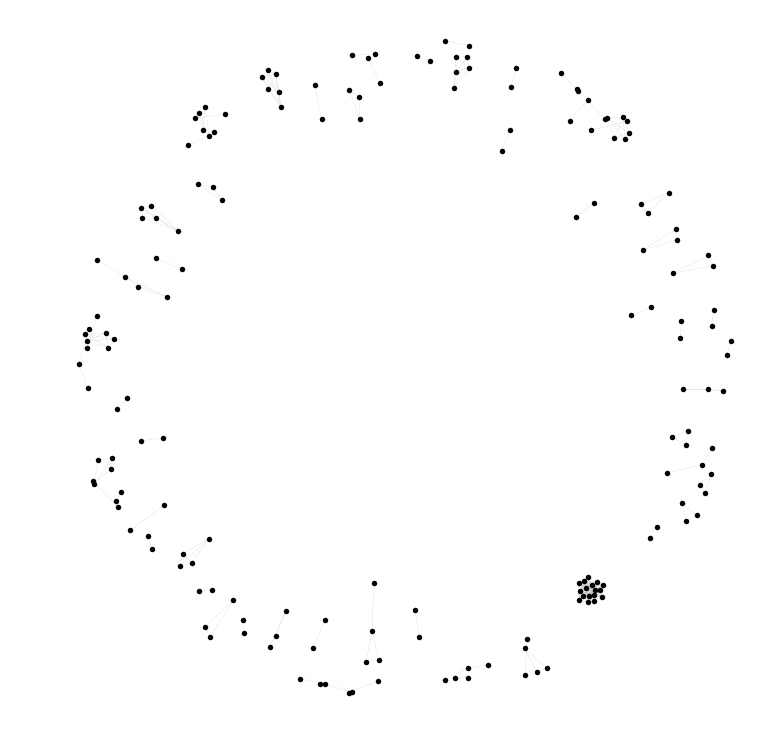

In [49]:
from math import sqrt
count = strong_G.number_of_nodes()
equilibrium = 10 / sqrt(count)    # default for this is 1/sqrt(n), but this will 'blow out' the layout for better visibility
pos = nx.fruchterman_reingold_layout(strong_G, k=equilibrium, iterations=300)
nx.draw(strong_G, pos=pos, **options, edge_color='gray')

In [54]:
plt.rcParams['figure.figsize'] = [100, 100]  # a better aspect ratio for labelled nodes

nx.draw(strong_G, pos, font_size=3, node_size=50, edge_color='gray', with_labels=False)
for p in pos:  # raise positions of the labels, relative to the nodes
    pos[p][1] -= 0.03
nx.draw_networkx_labels(strong_G, pos, font_size=8, font_color='k')
plt.savefig('network2.png')
plt.show()